In [27]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

#give more visualization of the data in the notebook
#graphs of how many columns, distribution
#give citations for data, code
#state goals after pre-processing of data
#state reasons for doing these things
#show different models I tried
#show evaluation of models



#enc_var = Dict.new_dict(capshape = ['b', 'c', 'x', 'f', 'k', 's'], capsurface = ['f', 'g', 'y', 's'], color= ['k','n', 'b', 'h', 'c','g', 'o', 'r','p','u','e','w','y'], bruises = ['t', 'f'],
 #                  odor = ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], gillattachment = ['a', 'd', 'f', 'n'], gillspacing = ['c', 'w', 'd'], gillsize = ['b', 'n'], 
  #                 stalkshape = ['e', 't'], stalkroot = ['b','c','u','e','z','r','?'], surface = ['f','y','k','s'], veiltype = ['p','u'], ringnumber = ['n','o','t'],
   #                population = ['a', 'c', 'n', 's', 'v', 'y'], habitat= ['g', 'l','m','p','u','w','d'])




Import dataset, acquired from Kaggle originally from the UCI Machine Learning database.

In [28]:
file_path = "/content/mushrooms.csv"
data = pd.read_csv(file_path)
print(data.shape)


(8124, 23)


The data needs to be encoded, because it uses letters to describe the mushrooms rather than numbers. At first I was having trouble with the encoding, because I split the data into x and y before encoding, but this discussion thread (https://www.kaggle.com/uciml/mushroom-classification/discussion/156494) led me to see that this other person split after encoding. And his model was doing way better than mine, so I switched around the way I encoded the data and it went a lot better. I also took out a few columns, because the data set had their data labeled as mismatched.

In [58]:
le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])

y = data["class"]
x = data.drop(["class","gill-attachment","bruises"], axis = 1)

xv = x.values
yv = y.values


print(xv)


[[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]


Visualizing the data.

20


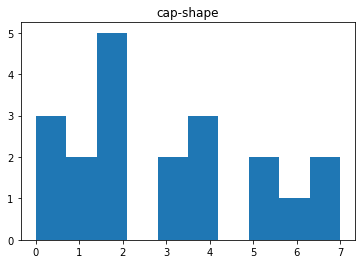

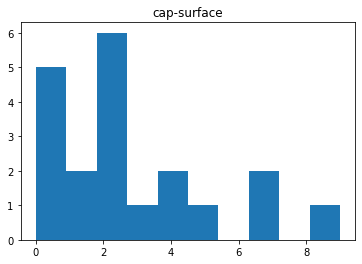

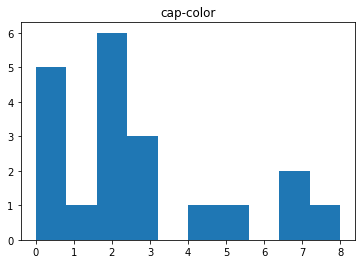

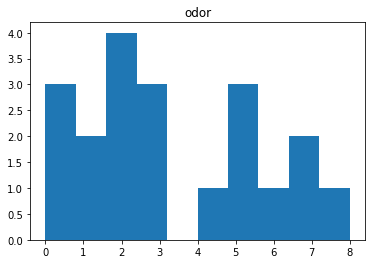

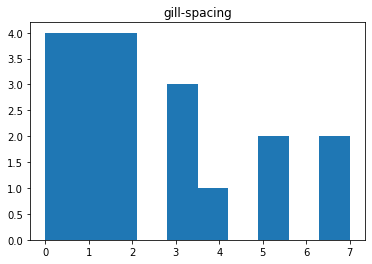

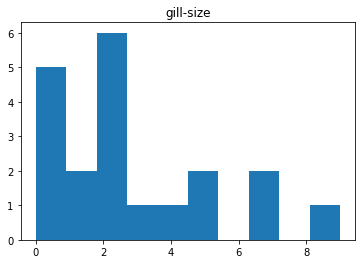

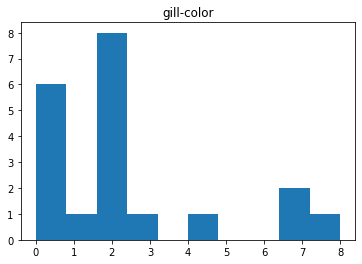

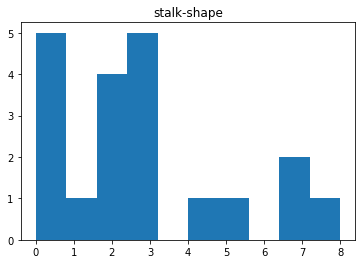

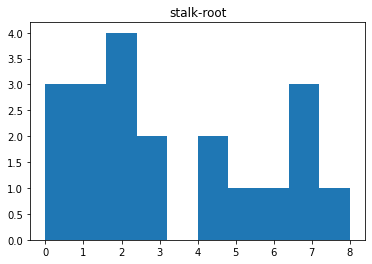

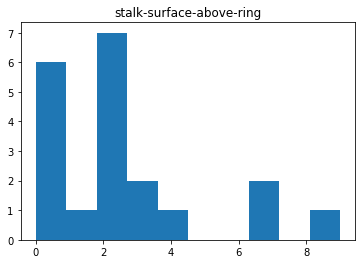

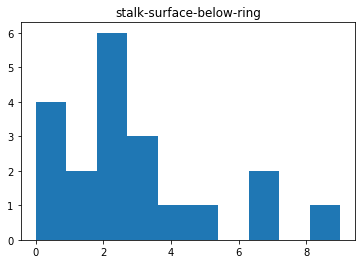

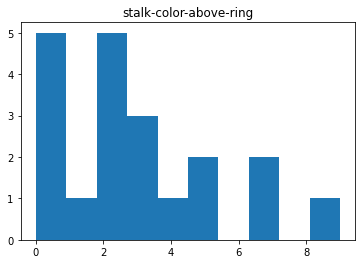

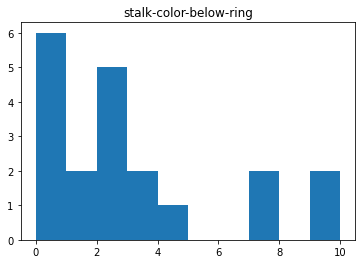

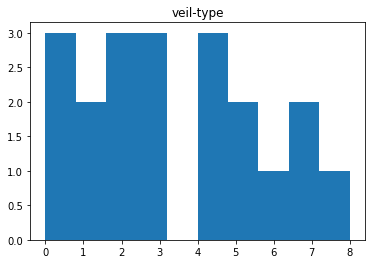

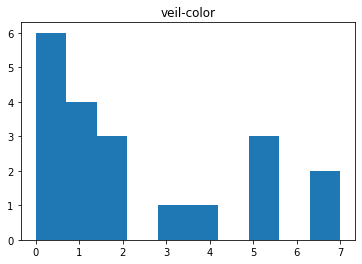

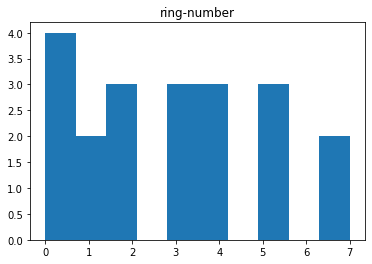

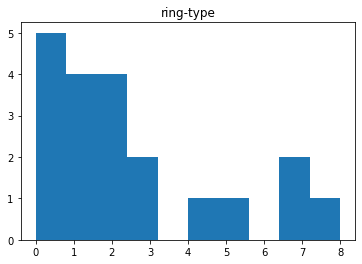

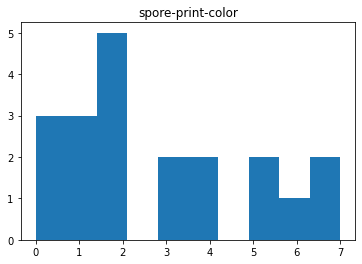

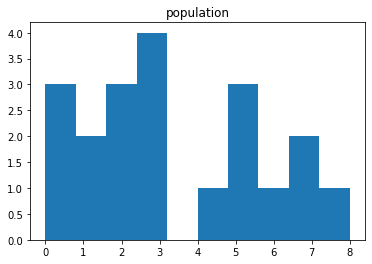

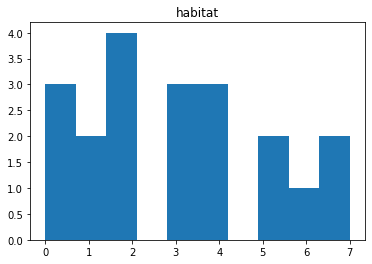

In [88]:
print(xv.shape[1])

for j in range(0, len(x.columns)):
        plt.hist(xv[j])
        plt.title(x.columns[j])
        plt.show()
        

Using PCA to find the most important data to use, as there is quite a lot of it that would slow the model down.

In [65]:
from sklearn.decomposition import PCA

#pca_full = PCA(n_components = 20)
#pca_full.fit(xv)
#print(pca_full.explained_variance_ratio_)
#this tells me that I only need PC 0-12

pca = PCA(n_components = 12)
pca.fit(xv)
pca_X = pca.transform(xv)
print(pca_X.shape)


(8124, 12)


This is a binary classification problem, so I have the following options: SVM, K-means clustering, logistic regression, and decision tree. First I need to split the data though.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(xv, yv, test_size=0.8, random_state=2019)
print(x_test.shape)



(6500, 20)


Logistic Regression Model and then evaluation.

In [70]:
logistic_reg_model = LogisticRegression(max_iter = 1000)
logistic_reg_model.fit(x_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:

def confusionMatrix(TP, TN, FP, FN):
    print("         Actual")
    print("m         True | False")
    print("o True [", TP, " | ", FP, "]")
    print("d      [--------------]")
    print("e False[", TN, "  | ",FN, "]")
    print("l")

predict = logistic_reg_model.predict(x_test)

[TP, TN, FP, FN] = confusion_matrix(y_test, predict, labels = [1,0]).ravel()
confusionMatrix(TP, TN, FP, FN)
print((TP+TN)/(TP+TN+FP+FN))
print(TP/(TP+FP))
print(TP/(TP+FN))
print(2*TP/(2*(TP+FN+FP)))



         Actual
m         True | False
o True [ 2936  |  142 ]
d      [--------------]
e False[ 213   |  3209 ]
l
0.48446153846153844
0.9538661468486029
0.47778681855166805
0.46699538730714174


The logistic regression model looks like it's doing good, but there are some false positives. It has a good precision score, which is the main goal, because that means that the model isn't likely to say poisonous mushrooms are edible!

Lets try K-means clustering. Because there are two categories, I chose 2 clusters.

In [73]:
kModel2=KMeans(n_clusters=2, random_state=9).fit(x_train)

y_pred2 = kModel2.predict(x_test)


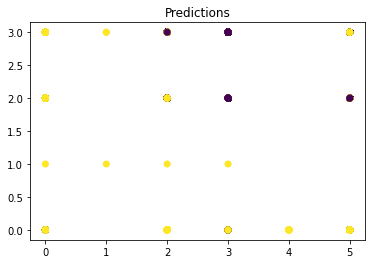

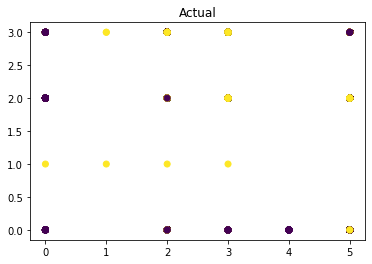

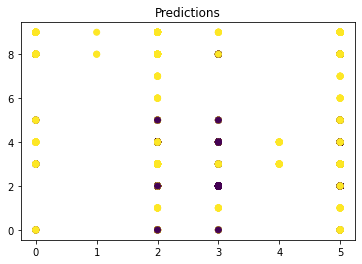

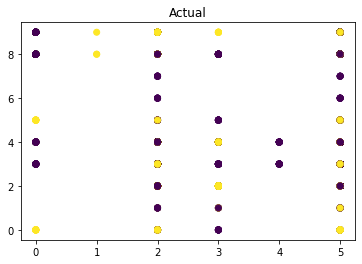

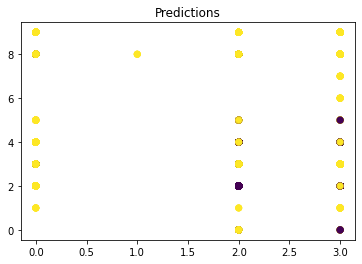

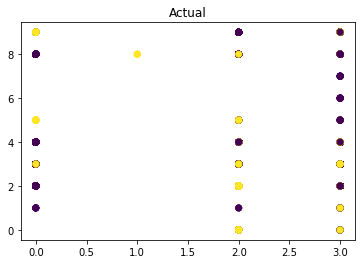

In [74]:

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred2)
plt.title("Predictions")
plt.show()

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.title("Actual")
plt.show()

plt.scatter(x_test[:, 0], x_test[:, 2], c=y_pred2)
plt.title("Predictions")
plt.show()

plt.scatter(x_test[:, 0], x_test[:, 2], c=y_test)
plt.title("Actual")
plt.show()


plt.scatter(x_test[:, 1], x_test[:, 2], c=y_pred2)
plt.title("Predictions")
plt.show()

plt.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
plt.title("Actual")
plt.show()


Clustering is not really worth getting the exact numbers and I'm not sure why it is showing up that way. Below is the decision tree implementation and evaluation.

         Actual
m         True | False
o True [ 3149  |  0 ]
d      [--------------]
e False[ 0   |  3351 ]
l
0.48446153846153844
1.0
0.48446153846153844
0.48446153846153844


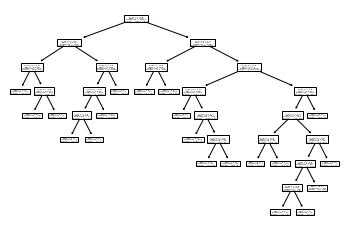

In [87]:
my_tree = DecisionTreeClassifier(max_depth = 100)
fig = my_tree.fit(x_train,y_train)
tree.plot_tree(fig)
fig1 = tree.plot_tree(fig)
plt.savefig('fig1.pdf')

predict = fig.predict(x_test)

[TP, TN, FP, FN] = confusion_matrix(y_test, predict, labels = [1,0]).ravel()

confusionMatrix(TP, TN, FP, FN)
print((TP+TN)/(TP+TN+FP+FN))
print(TP/(TP+FP))
print(TP/(TP+FN))
print(2*TP/(2*(TP+FN+FP)))


It's very strange, but it ended up being 100% positive! This is preferable for this data set, as the false positives could be deadly. 